# Lab 2: Linear Regression (continuation)

In this second practice session, we will train our linear model and predict outputs by using predefined functions in 
[**sklearn Library**](http://scikit-learn.org/stable/).  
This library has many classes and modules that are usefull for different problems of machine learning. During this seession, we will use [**Linear Regression**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from [**Linear Model**](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module.  

<font color="blue">**Question 1: **</font> 
- Train the linear model with "X" and "y" data.  
**Hint**: use [fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) function from linear regression class.
- Estimate the price of a house with 330 m² area and 5 rooms.  
**Hint**: use [predict]() function from linear regression class.

<font color="blue">**Question 2: **</font> Compare coefficients, intercept and performance of the linear model trained with sklearn library and the one trained with gradient descent.

Coefficients:  [[  2.66714891 -20.97206642]]
Intercept:  [ 222.74748713]
The predicted price of a 330 m² house with 5 rooms is: 998.0462948365729 k€

Mean squared error: 18244.72
Final error =  9122.3604923
R² score: 0.31


<IPython.core.display.Javascript object>


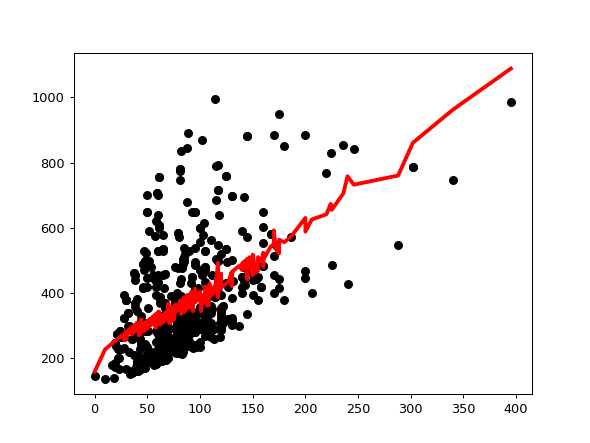

<IPython.core.display.Javascript object>


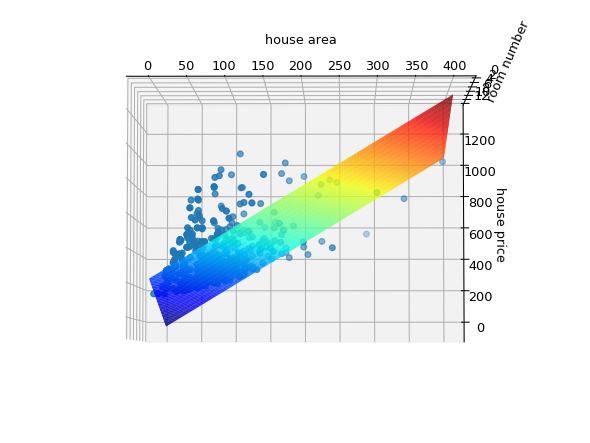

Text(0.5,0,'house price')

In [1]:
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm
%matplotlib notebook

house_data = np.loadtxt('house.csv') 

m = house_data.shape[0]         # number of sample
x_1 = house_data[:,0,np.newaxis]
x_2 = house_data[:,1,np.newaxis]

X = np.concatenate((x_1,x_2),axis=1)
n = house_data.shape[0]         # number of features
y = house_data[:,2,np.newaxis]

regr = linear_model.LinearRegression()
# your code here

regr.fit(X,y)
# coefficients and intercept
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

# use the trained model to predict
prediction = regr.predict(X)

area = 330
nbr_room = 5
price = regr.predict(np.array([[area,nbr_room]]))
print("The predicted price of a {0} m² house with {1} rooms is: {2} k€".format(area,nbr_room,price[0,0]))

# mean squared error and R^2 score
print()
print("Mean squared error: %.2f"% mean_squared_error(y, prediction))
print("Final error = ",np.sum((prediction-y)**2)/(2*m))
print('R² score: %.2f' % regr.score(X, y))

# plot the model
fig=plt.figure('Linear model plot')
plt.scatter(x_1, y,  color='black')
plt.plot(np.sort(x_1,axis=0),prediction[np.argsort(x_1,axis=0),0], color='red', linewidth=3)


fig=plt.figure('Surface plot')
ax=Axes3D(fig)
ax.scatter(x_1,x_2,y)

x1 = np.linspace(0,400,400) 
x2 = np.arange(13)
x1, x2 = np.meshgrid(x1, x2)

X3=np.concatenate((x1[:,:,np.newaxis],x2[:,:,np.newaxis]),axis=-1)
X3bis=X3.reshape((X3.shape[0]*X3.shape[1],X3.shape[2]))
Zbis =  regr.predict(X3bis)
Z=Zbis.reshape((X3.shape[0],X3.shape[1]))

ax.plot_surface(x1,x2,Z,rstride=1,cstride=1,cmap=cm.jet,linewidth=1,antialiased=True)
ax.set_xlabel('house area')
ax.set_ylabel('room number')
ax.set_zlabel('house price')


<font color="Green"><u>_**Observations:**_</u></font>
- The "fit" function use the data matrix X and the output vector "y" to train a linear model. In the matrix X, we don't have to include the bias term or normalized features because the sklearn library automatically do these processing on raw data.
- The sklearn library produce a linear model similar to our model trained with gradient descent algorithm. However, the result of sklearn library is more optimized: final error equal to 9122,36 vs 9228,41 on our algorithm. We can obtain the same result with our algorithm (Question 9 from Lab 1) by increasing the number of iteration to 1000 and the learning rate $\alpha$ to 0,1.